In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print("Jumlah Missing Value di setiap kolom:\n")
print(df.isnull().sum())

Jumlah Missing Value di setiap kolom:

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [4]:
print("\nJumlah data duplikat:", df.duplicated().sum())


Jumlah data duplikat: 0


In [5]:
df = df.drop_duplicates()

In [6]:
print("Jumlah data setelah menghapus duplikat:", df.shape)

Jumlah data setelah menghapus duplikat: (768, 9)


In [7]:
def remove_outliers_iqr(data, columns):
    df_clean = data.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

num_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness',
            'Insulin','BMI','DiabetesPedigreeFunction','Age']

df_clean = remove_outliers_iqr(df, num_cols)

print("\nJumlah data setelah menghapus outlier:", df_clean.shape)


Jumlah data setelah menghapus outlier: (636, 9)


In [8]:
scaler = StandardScaler()
df_scaled = df_clean.copy()
df_scaled[num_cols] = scaler.fit_transform(df_clean[num_cols])

print("Contoh hasil normalisasi:")
df_scaled.head()

Contoh hasil normalisasi:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.681426,1.005403,-0.000696,0.936596,-0.826197,0.256438,0.819791,1.604688,1
1,-0.857590,-1.168963,-0.532036,0.542370,-0.826197,-0.840893,-0.307223,-0.143041,0
2,1.297032,2.213384,-0.709149,-1.363054,-0.826197,-1.358207,1.003543,-0.051055,1
3,-0.857590,-1.030908,-0.532036,0.148145,0.299065,-0.605751,-1.058566,-1.062898,0
5,0.373623,-0.099037,0.176417,-1.363054,-0.826197,-0.997655,-0.919731,-0.235026,0


In [9]:
print("Tidak ada kolom kategorikal yang perlu di-encode.")

Tidak ada kolom kategorikal yang perlu di-encode.


In [10]:
df_scaled['BMI_Age_Ratio'] = df_scaled['BMI'] / (df_scaled['Age'] + 1)

print("Fitur baru 'BMI_Age_Ratio' berhasil ditambahkan:")
df_scaled[['BMI', 'Age', 'BMI_Age_Ratio']].head()

Fitur baru 'BMI_Age_Ratio' berhasil ditambahkan:


,BMI,Age,BMI_Age_Ratio
0,0.256438,1.604688,0.098453
1,-0.840893,-0.143041,-0.981252
2,-1.358207,-0.051055,-1.431281
3,-0.605751,-1.062898,9.630663
5,-0.997655,-0.235026,-1.304169


In [11]:
X = df_scaled.drop('Outcome', axis=1)
y = df_scaled['Outcome']

# Membagi data menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Ukuran Data Training :", X_train.shape)
print("Ukuran Data Testing  :", X_test.shape)

Ukuran Data Training : (508, 9)
Ukuran Data Testing  : (128, 9)


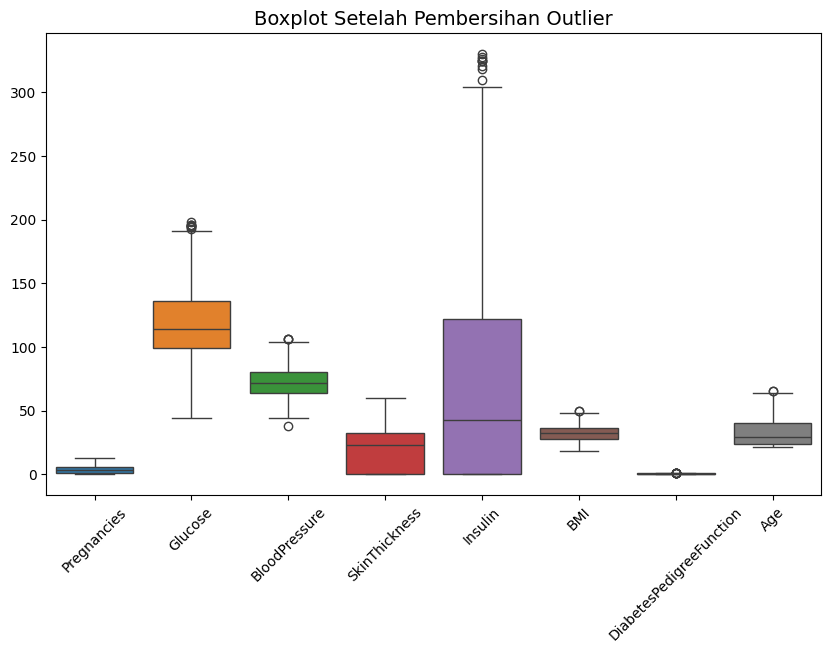

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_clean[num_cols])
plt.title("Boxplot Setelah Pembersihan Outlier", fontsize=14)
plt.xticks(rotation=45)
plt.show()

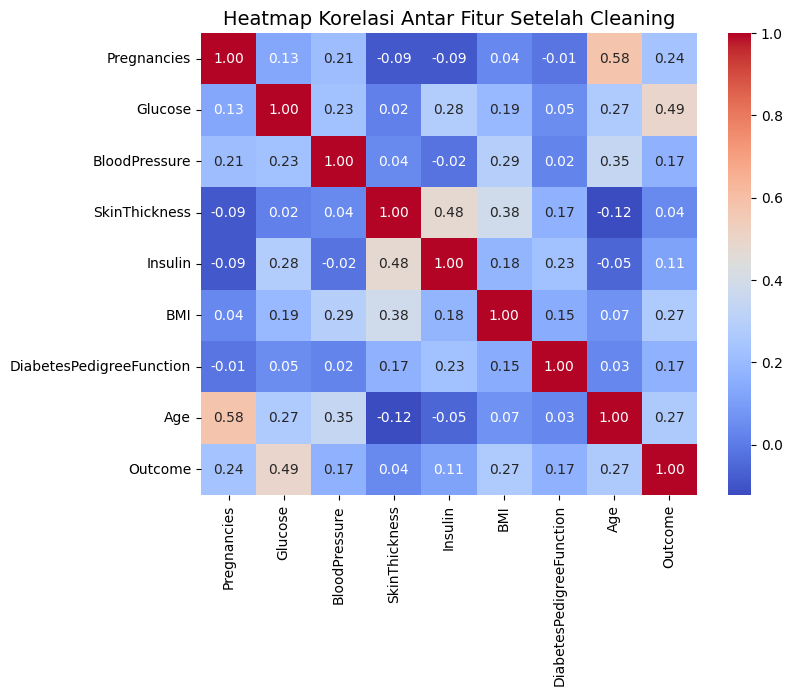

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Antar Fitur Setelah Cleaning", fontsize=14)
plt.show()

# POSTTEST 3 - Data Preprocessing

---

## 🔹 1. Data Cleaning
- Tidak ada missing value.
- Tidak ada data duplikat.
- Outlier dihapus menggunakan metode **IQR (Interquartile Range)**.
- Setelah outlier dihapus, jumlah data menjadi lebih bersih dan representatif.

---

## 🔹 2. Normalisasi / Standarisasi
- Semua fitur numerik dinormalisasi menggunakan **StandardScaler** agar memiliki skala seragam (mean=0, std=1).
- Hal ini penting agar model tidak bias terhadap fitur dengan rentang nilai besar.

---

## 🔹 3. Encoding Kolom Kategorikal
- Dataset tidak memiliki kolom kategorikal.
- Jika ada di dataset lain, proses encoding bisa dilakukan menggunakan **LabelEncoder** atau **OneHotEncoder**.

---

## 🔹 4. Feature Engineering
- Ditambahkan fitur baru **BMI_Age_Ratio = BMI / (Age + 1)**.
- Fitur ini menggambarkan perbandingan indeks massa tubuh terhadap usia pasien.

---

## 🔹 5. Splitting Data
- Dataset dibagi menjadi **80% training** dan **20% testing**.
- Stratified split digunakan agar distribusi label (Outcome) tetap seimbang antara dua set data.

---

## 🔹 6. Visualisasi
- **Boxplot** menunjukkan distribusi fitur numerik setelah pembersihan outlier.
- **Heatmap** menunjukkan korelasi antar fitur — Glucose, BMI, dan Age memiliki hubungan kuat dengan Outcome.

---

## ✅ Kesimpulan
- Dataset Pima Indians Diabetes sudah melalui tahap preprocessing lengkap.
- Tidak ada missing value, duplikasi, maupun outlier.
- Data sudah distandarisasi, ditambah fitur baru, dan dibagi menjadi train-test set.